In [65]:
from scipy import *
from scipy import optimize

###########################################################
######## neutrino mass splitting calculation ##############
###########################################################

#### delta m21^2=7.37e-5
#### |delta m^2| = 2.5e-3 (normal) 2.46e-3 (inverted)
d31N = 2.5e-3
d31I = 2.46e-3
d21 = 7.37e-5

m2fcn = lambda m1: sqrt(d21 + m1**2)
m3_NH = lambda m1: sqrt(d31N + 0.5*m2fcn(m1)**2 +0.5*m1**2)
m3_IH = lambda m1: sqrt(0.5*m2fcn(m1)**2 +0.5*m1**2 - d31I)
root_NH = lambda m1, M: M-(m1+m2fcn(m1)+m3_NH(m1))
root_IH = lambda m1, M: M-(m1+m2fcn(m1)+m3_IH(m1))

Mmin_NH = sqrt(d21)+sqrt(d31N+d21/2)
Mmin_IH = sqrt(d31I-0.5*d21) + sqrt(d31I+0.5*d21)
m1min_IH = sqrt(d31I-0.5*d21)

def neutrino_mass_calc (M, split=1):
    '''split = 1, 2, 3 for normal, inverted, degenerate
    '''    
    #print M
    if split == 1:
        m1=optimize.bisect(root_NH, 0, M, args=(M,))       
        m2=m2fcn(m1)
        m3=m3_NH(m1)
    elif split == 2:
        m1=optimize.bisect(root_IH, m1min_IH, M, args=(M,))
        m2=m2fcn(m1)
        m3=m3_IH(m1)
    elif split ==3:
        m1, m2, m3 = ones(3)*M/3.0
    return m1,m2,m3

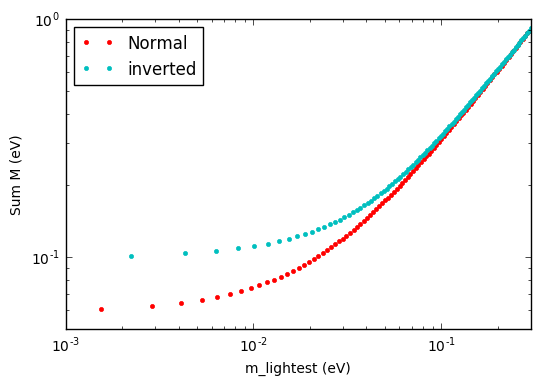

In [85]:
M_NH_arr = logspace(log10(Mmin_NH), 0, 101)
M_IH_arr = logspace(log10(Mmin_IH), 0, 101)

mlight_NH = array([neutrino_mass_calc (iM, split=1) for iM in M_NH_arr])
mlight_IH = array([neutrino_mass_calc (iM, split=2) for iM in M_IH_arr])
loglog(amin(mlight_NH,axis=1), M_NH_arr,'r.',label='Normal')
loglog(amin(mlight_IH,axis=1), M_IH_arr,'c.',label='inverted')
xlabel('m_lightest (eV)')
ylabel('Sum M (eV)')
ylim(5e-2, 1)
xlim(1e-3, 0.3)
legend(loc=0)
show()